# Final Model

After training a model using one of the CV schemes - see [nested CV](./nested_CV.ipynb), for example - we want to finalize, then save it for future use on new data.

---

## Saving a model with `pickle`


In [1]:
# Save Model Using Pickle
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 777
# simplest rain-test split
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
# Fit the model on training set
model = LogisticRegression()
model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7637795275590551


/opt/miniconda3/envs/islp/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Training and prediction

The simplest task is to fit a model to an entire dataset, then make a prediction using the fitted model.

We do this for

- a classificationn model
- a multiple regression model

In [2]:
# example of training a final classification model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# fit final model
model = LogisticRegression()
model.fit(X, y)
# new instances where we do not know the answer
Xnew, _ = make_blobs(n_samples=3, centers=2, n_features=2, random_state=1)
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[-0.79415228  2.10495117], Predicted=0
X=[-8.25290074 -4.71455545], Predicted=1
X=[-2.18773166  3.33352125], Predicted=0


In [3]:
# example of training a final regression model
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=2, noise=0.1)
# fit final model
model = LinearRegression()
model.fit(X, y)
# define one new data instance
Xnew = [[-1.07296862, -0.52817175]]
# new instances where we do not know the answer
#Xnew, _ = make_regression(n_samples=3, n_features=2, noise=0.1, random_state=1)
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[-1.07296862, -0.52817175], Predicted=-123.75765453929685


### Train-test split

Here we perform the most basic resampling, using a single train-test split.

- the regression model is fitted to the training data
- then, its performance can be estimated on the test data.

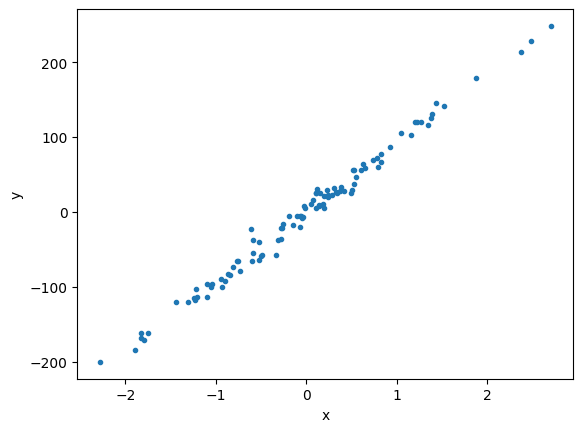

0.9929593335286535

In [4]:
# example of training a final regression model based on CV
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn import model_selection
import matplotlib.pyplot as plt

# generate regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.plot(X, y, '.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
test_size = 0.33
seed = 777
# simplest train-test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
# Fit the model on training set
model = LinearRegression()
model.fit(X_train, y_train)

# Print performance results
model.score(X_test, y_test)

### Cross-Validation resampling

Here we perform CV resampling, using a 10-fold train-test split.

Then we can display the score (R2, or others) together with its uncertainty.


In [5]:
from sklearn.model_selection import cross_val_score

data = X
target = y
scores = cross_val_score(model, data, target, cv=10, scoring="r2")
print(f"R2 score: {scores.mean():.3f} ± {scores.std():.3f}")

R2 score: 0.986 ± 0.011


## Finalizing

Suppose that we are satisfied with the model performance. 

- Now, we can fit this model on ALL the data, thus generating the **final** model.
- This finalized model can then be used to predict some new value, or saved for later use.

In [6]:
# fit finalized model on ALL the data
model.fit(X, y)
# define one new data instance
Xnew = [[-1.07296862]]
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[-1.07296862], Predicted=-99.38329461342201


In [7]:
# save the model to disk
filename = 'finalized_reg_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
Xnew = [[-1.07296862]]
# make a prediction
ynew = loaded_model.predict(Xnew)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[-1.07296862], Predicted=-99.38329461342201
